# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team CW2**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

## Introduction



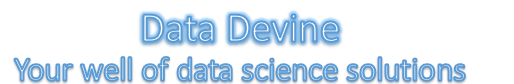







   
   
   
   
   











Data Devine is a medium sized consultancy company based in Nairobi, Kenya.
We solve business problems of the 21st century using data.
We  provide data science solutions including, data collection, data cleaning, data analysis and model building.
We work with government entities, financial institutions and health sectors.


The government of Spain has approached our company and requested that we model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as pressure, wind speed, humidity, etc. This is due to the increase in the usage of electricity and generation of electricity by means of non renewable becoming unstainable,

To tackle the problem, We will in this notebook perform an Exploratory Data Analysis using the data provided that contains information abouth the weather conditions in different cities at Spain. We will then perform data engineering and lastly build models for the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain and present results to the government officials of Spain.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 0

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


EDA is a data exploration technique to understand the various aspects of the data. EDA is often used to see what data may disclose outside of formal modelling and to learn more about the variables in a data collection and how they interact.

In this section we will perform the EDA on the training dataset in order to farmilirialise ourselves with the data, discover any issues that the data may contain an ponder on how the issues will be handled in the data engineering section.

In [3]:
#Exploring the dataset
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333


In [4]:
df.shape

(8763, 49)

- The dataset consists of 8763 entries and 49 features
- There is a column Unamed:0  which seems to be a replica of the index column
- The transpose method was used in order to see all columns as some columns can be hidden if the dataframe is not transposed.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

- Time datatype is an object 
- Seville_pressure datatype is of object type instead of numeric
- Valencia_wind_degree column is of object type instead of numeric
- Valencia_pressure consist of 6695 non-null values, the total of missing values can be seen in cell below:

### Missing Values

Missing values occurs when we do not have data stored for certain variables or features.
Missing values need to be treated with caution as they might distort the modelling process if not treated properly.
Below we will determine if our dataset contains any missing values so that they will be treated in the data engineering process.

In [6]:
#Sum of missing values
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Above we have computed the sum of the missing values per feature and observed the following:

- Valencia_pressure column has 2068 missing values
- The null values constitute about 23% which significantly is a small amount. We will not drop the null values however we intend to fill them in the data engineering section.
- All other columns do not contain any missing values.

### Data Statistics

In the below cell we will compute the summary statistics of each feature of our dataset.
Summary statistics summarize and provide information about the dataset. It tells us something about the values in our dataset. This includes where the mean lies, whether your data is skewed and whether there are outliers in the dataset.

In [7]:
#Data statistics
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.00000,4381.00000,2529.80454,0.00000,2190.50000,4381.00000,6571.50000,8762.00000
Madrid_wind_speed,8763.00000,2.42573,1.85037,0.00000,1.00000,2.00000,3.33333,13.00000
Bilbao_rain_1h,8763.00000,0.13575,0.37490,0.00000,0.00000,0.00000,0.10000,3.00000
Valencia_wind_speed,8763.00000,2.58627,2.41119,0.00000,1.00000,1.66667,3.66667,52.00000
Seville_humidity,8763.00000,62.65879,22.62123,8.33333,44.33333,65.66667,82.00000,100.00000
Madrid_humidity,8763.00000,57.41472,24.33540,6.33333,36.33333,58.00000,78.66667,100.00000
Bilbao_clouds_all,8763.00000,43.46913,32.55104,0.00000,10.00000,45.00000,75.00000,100.00000
Bilbao_wind_speed,8763.00000,1.85036,1.69589,0.00000,0.66667,1.00000,2.66667,12.66667
Seville_clouds_all,8763.00000,13.71475,24.27248,0.00000,0.00000,0.00000,20.00000,97.33333
Bilbao_wind_deg,8763.00000,158.95751,102.05630,0.00000,73.33333,147.00000,234.00000,359.33333


From the above table we can observe that some of the features consists of outliers  as the max values are way higher than the mean of the data.
We will explore this visually in the below cells by looking into boxplots of each feature

### Outliers

Outliers are abnormal values in a datasets that do not go with the regular distrutions and can distort a model by causing it to make bad predictions if not treated.
From the above it can be seen that some columns consist of outliers with Max values being far off from the mean value.
Below we will plot box plots for each column to explore the outliers for each column visually.

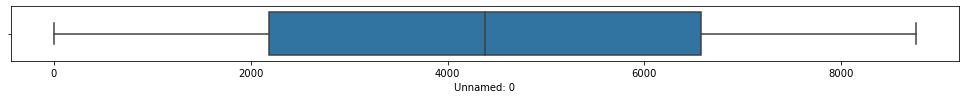

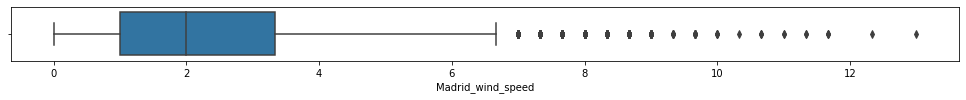

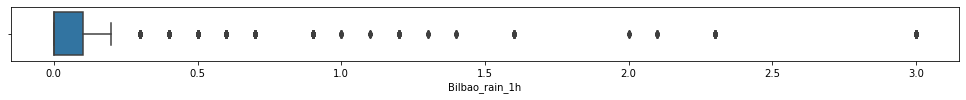

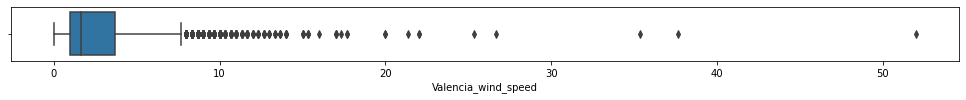

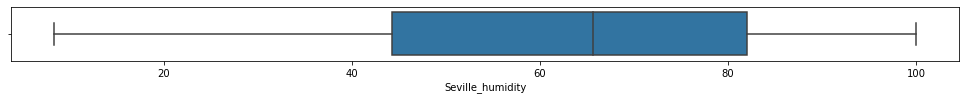

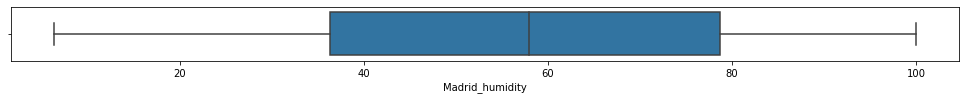

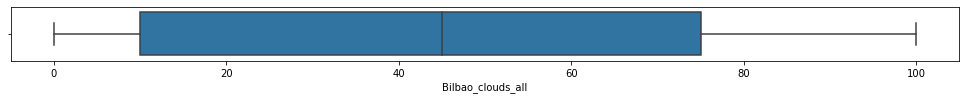

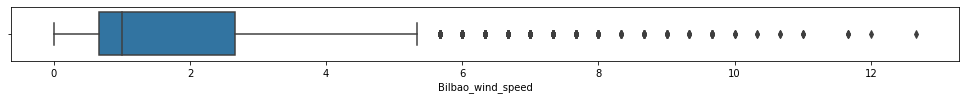

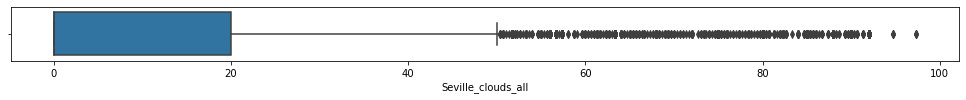

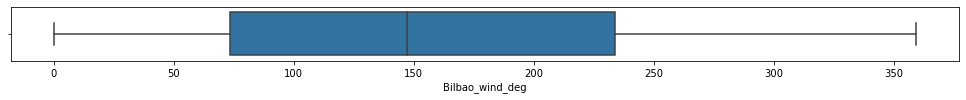

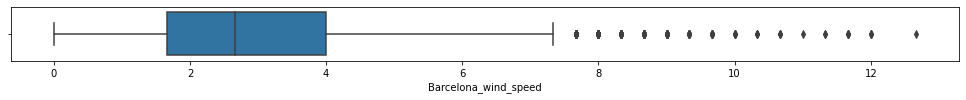

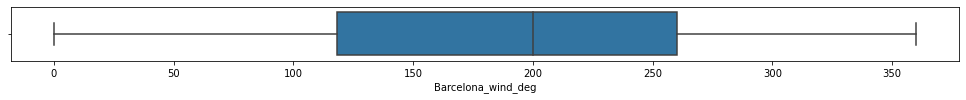

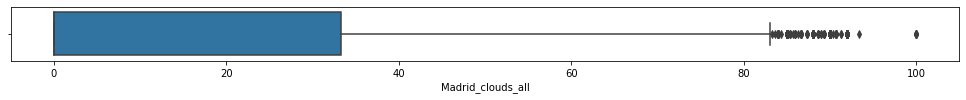

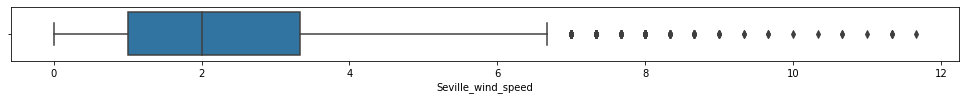

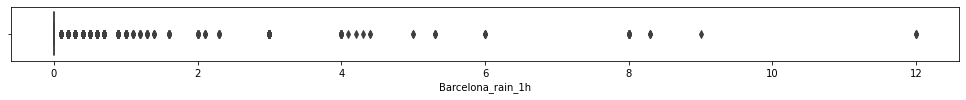

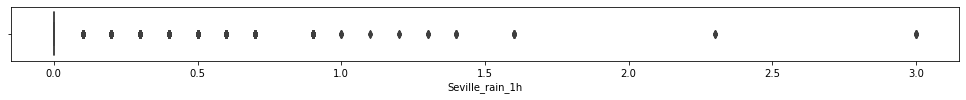

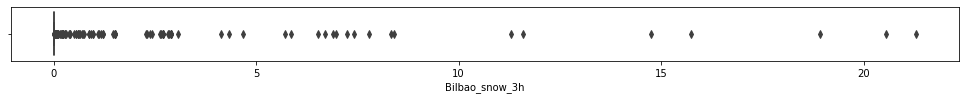

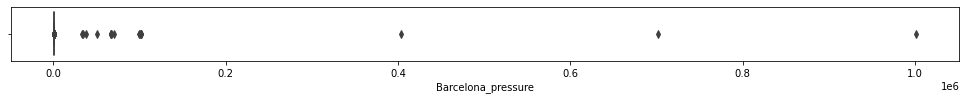

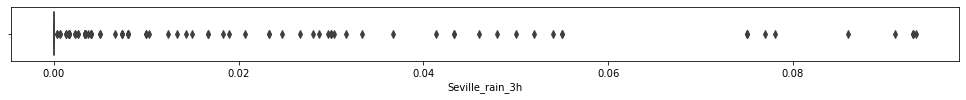

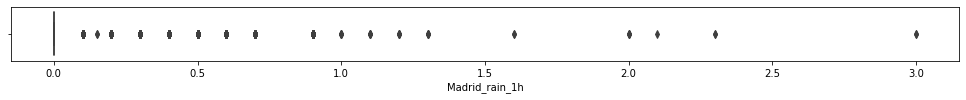

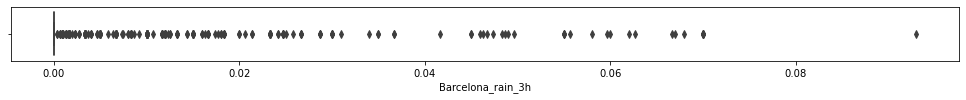

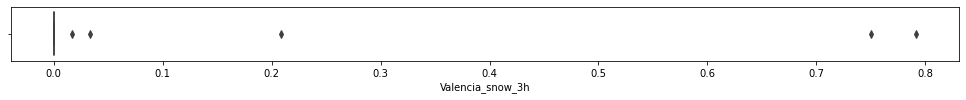

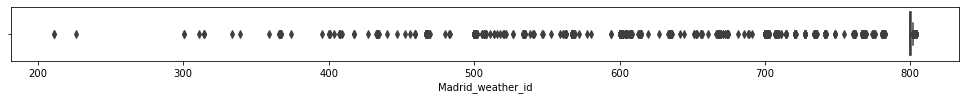

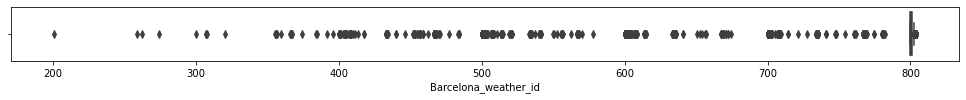

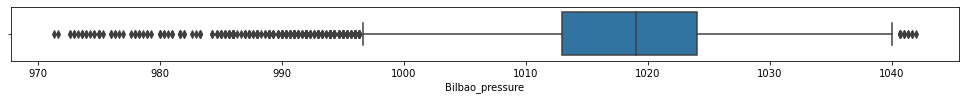

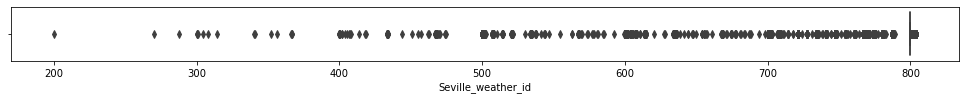

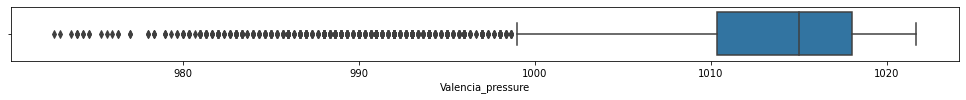

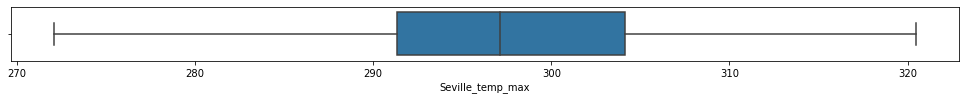

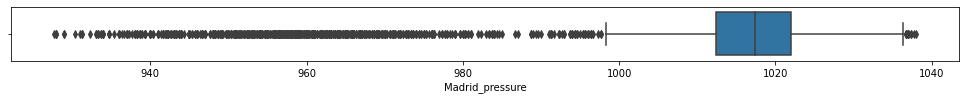

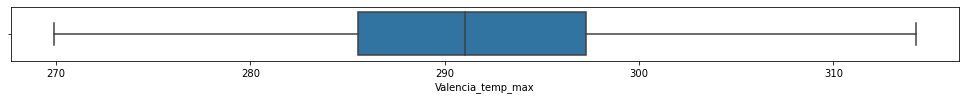

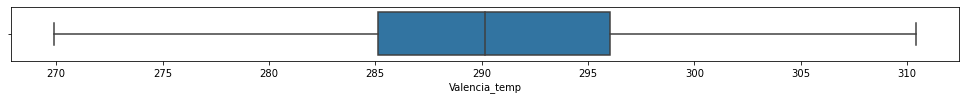

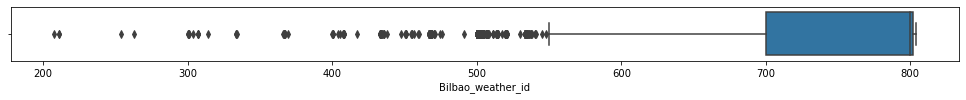

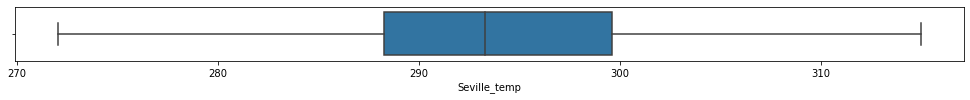

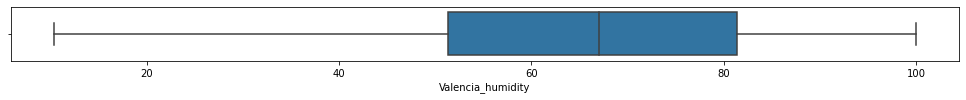

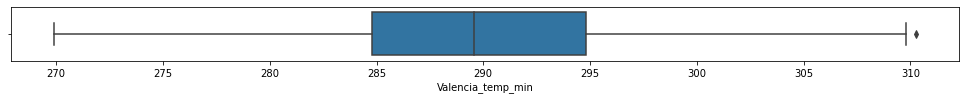

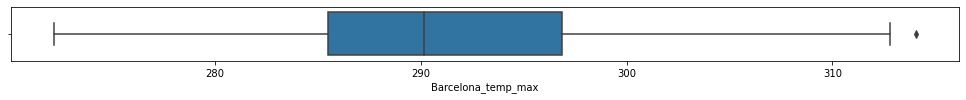

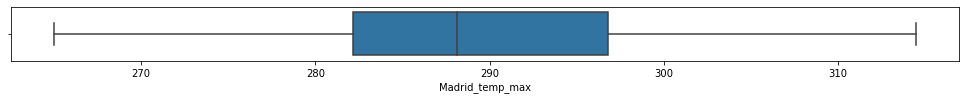

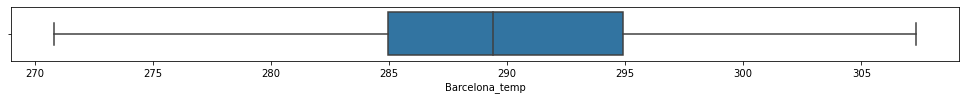

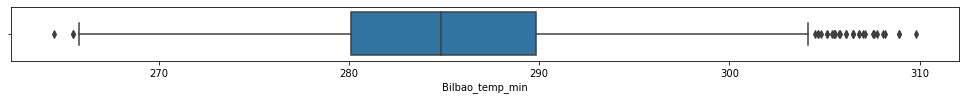

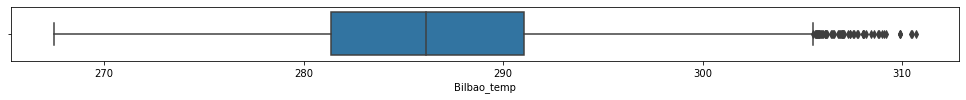

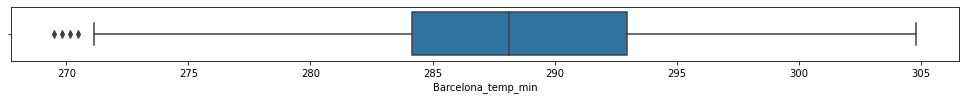

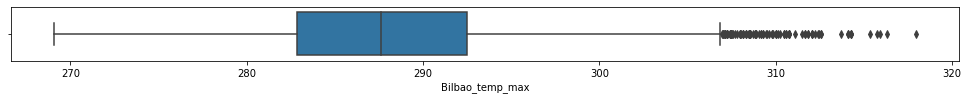

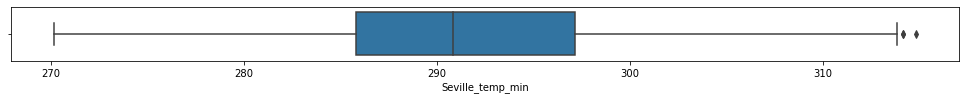

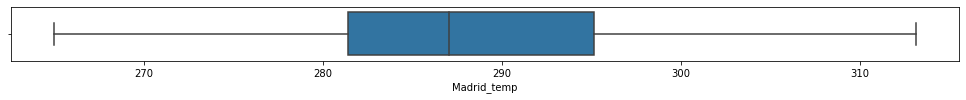

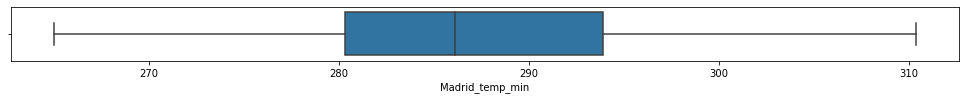

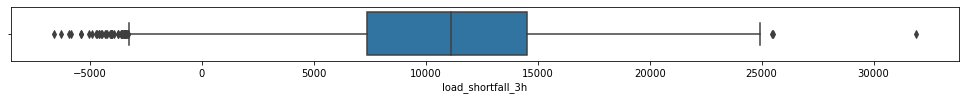

In [8]:
plt.rcParams.update({'figure.max_open_warning': 0})
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

- 28 of the 49 columns consists of outliers.
- Columns such as Madrd_wind_speed,Bilbao_rain_1h,Valencia_windspeed etc consists of outliers
- The response column also consists of outliers as can be seen on the plots.
- Outliers can be identified by the black little dos that are outside the minimum and maximum values of the box plot.
- It is important to note that Valencia_pressure which is the feature that contains missing values consists of outliers, this will assist with chosing the correct way of imputation in the data engineering section.

### Correlation

Heatmaps are generally used to show the relationship between two or more variables visually.
Below we will use a heatmap to visualize the relationship amongst the features.

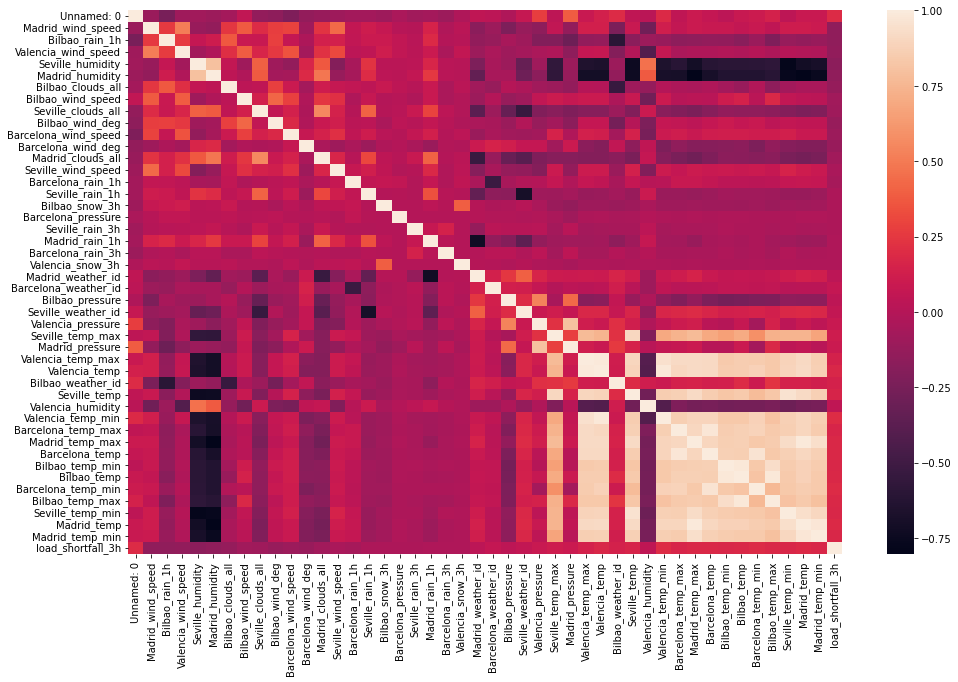

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())
plt.show()


- The above heatmap shows suggests that there exist astrong correlation amongsts variables at the bottom right corner of the plot.
- This also implies multicollineartity amongst columns which might affect the modelling negatively.
- There seems to be no correlation bewtween the predictor vatiables and the response variable being  the load_shortfall_3h
- We will check below the exact features which are correlated to each other and we will drop this features in the data engineering section.

In [10]:
#Function that defines the threshold for multicollinear features and returns collinear features
def correlation(df, threshold):
    corr_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_cols.add(colname)
    return corr_cols

In [11]:
# Call our function with our datafame and threshold of 0.75 as arguments
corr_featurs = correlation(df, 0.75)

In [12]:
corr_featurs

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_humidity',
 'Madrid_pressure',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_max',
 'Valencia_temp_min'}

Above we have determined the features with a correlation of above 0.75 and above.
Next we will check if there is any correlation between the predictors and the response feature.

In [13]:
corrmat = df.corr()
sorted_corrs = corrmat['load_shortfall_3h'].abs().sort_values()
print(sorted_corrs)

Valencia_snow_3h        0.021633
Barcelona_rain_3h       0.024720
Madrid_rain_1h          0.027159
Madrid_weather_id       0.030868
Seville_rain_1h         0.031572
Bilbao_snow_3h          0.031721
Seville_rain_3h         0.032945
Barcelona_pressure      0.034385
Bilbao_pressure         0.039052
Valencia_humidity       0.043140
Seville_wind_speed      0.048433
Barcelona_rain_1h       0.056633
Seville_weather_id      0.061104
Barcelona_weather_id    0.063868
Bilbao_wind_speed       0.081602
Madrid_clouds_all       0.081623
Valencia_pressure       0.086022
Seville_clouds_all      0.091804
Madrid_pressure         0.092638
Barcelona_wind_speed    0.103633
Seville_temp_max        0.109834
Barcelona_wind_deg      0.116133
Bilbao_wind_deg         0.120800
Bilbao_clouds_all       0.127293
Valencia_wind_speed     0.142791
Valencia_temp_max       0.144270
Bilbao_weather_id       0.145875
Madrid_humidity         0.150536
Madrid_wind_speed       0.150981
Bilbao_rain_1h          0.152510
Seville_te

Above we can see that there is little to no correlation between the predictors and the response feature. 
With a maximum correlation of 0.2 between Valencia_temp_min and the load_shortfall_3h.

### Feature Distributions

Histograms provide a visual interpretation of numerical data by indicating the number of data points that lie within a range of values. They generally show the sistribution of data in features.
Below we will plot histograms for each feature to get a feel of the distribution of the data in our features.
Knowing the distribution of our data allows us to know how further to analyse our data.

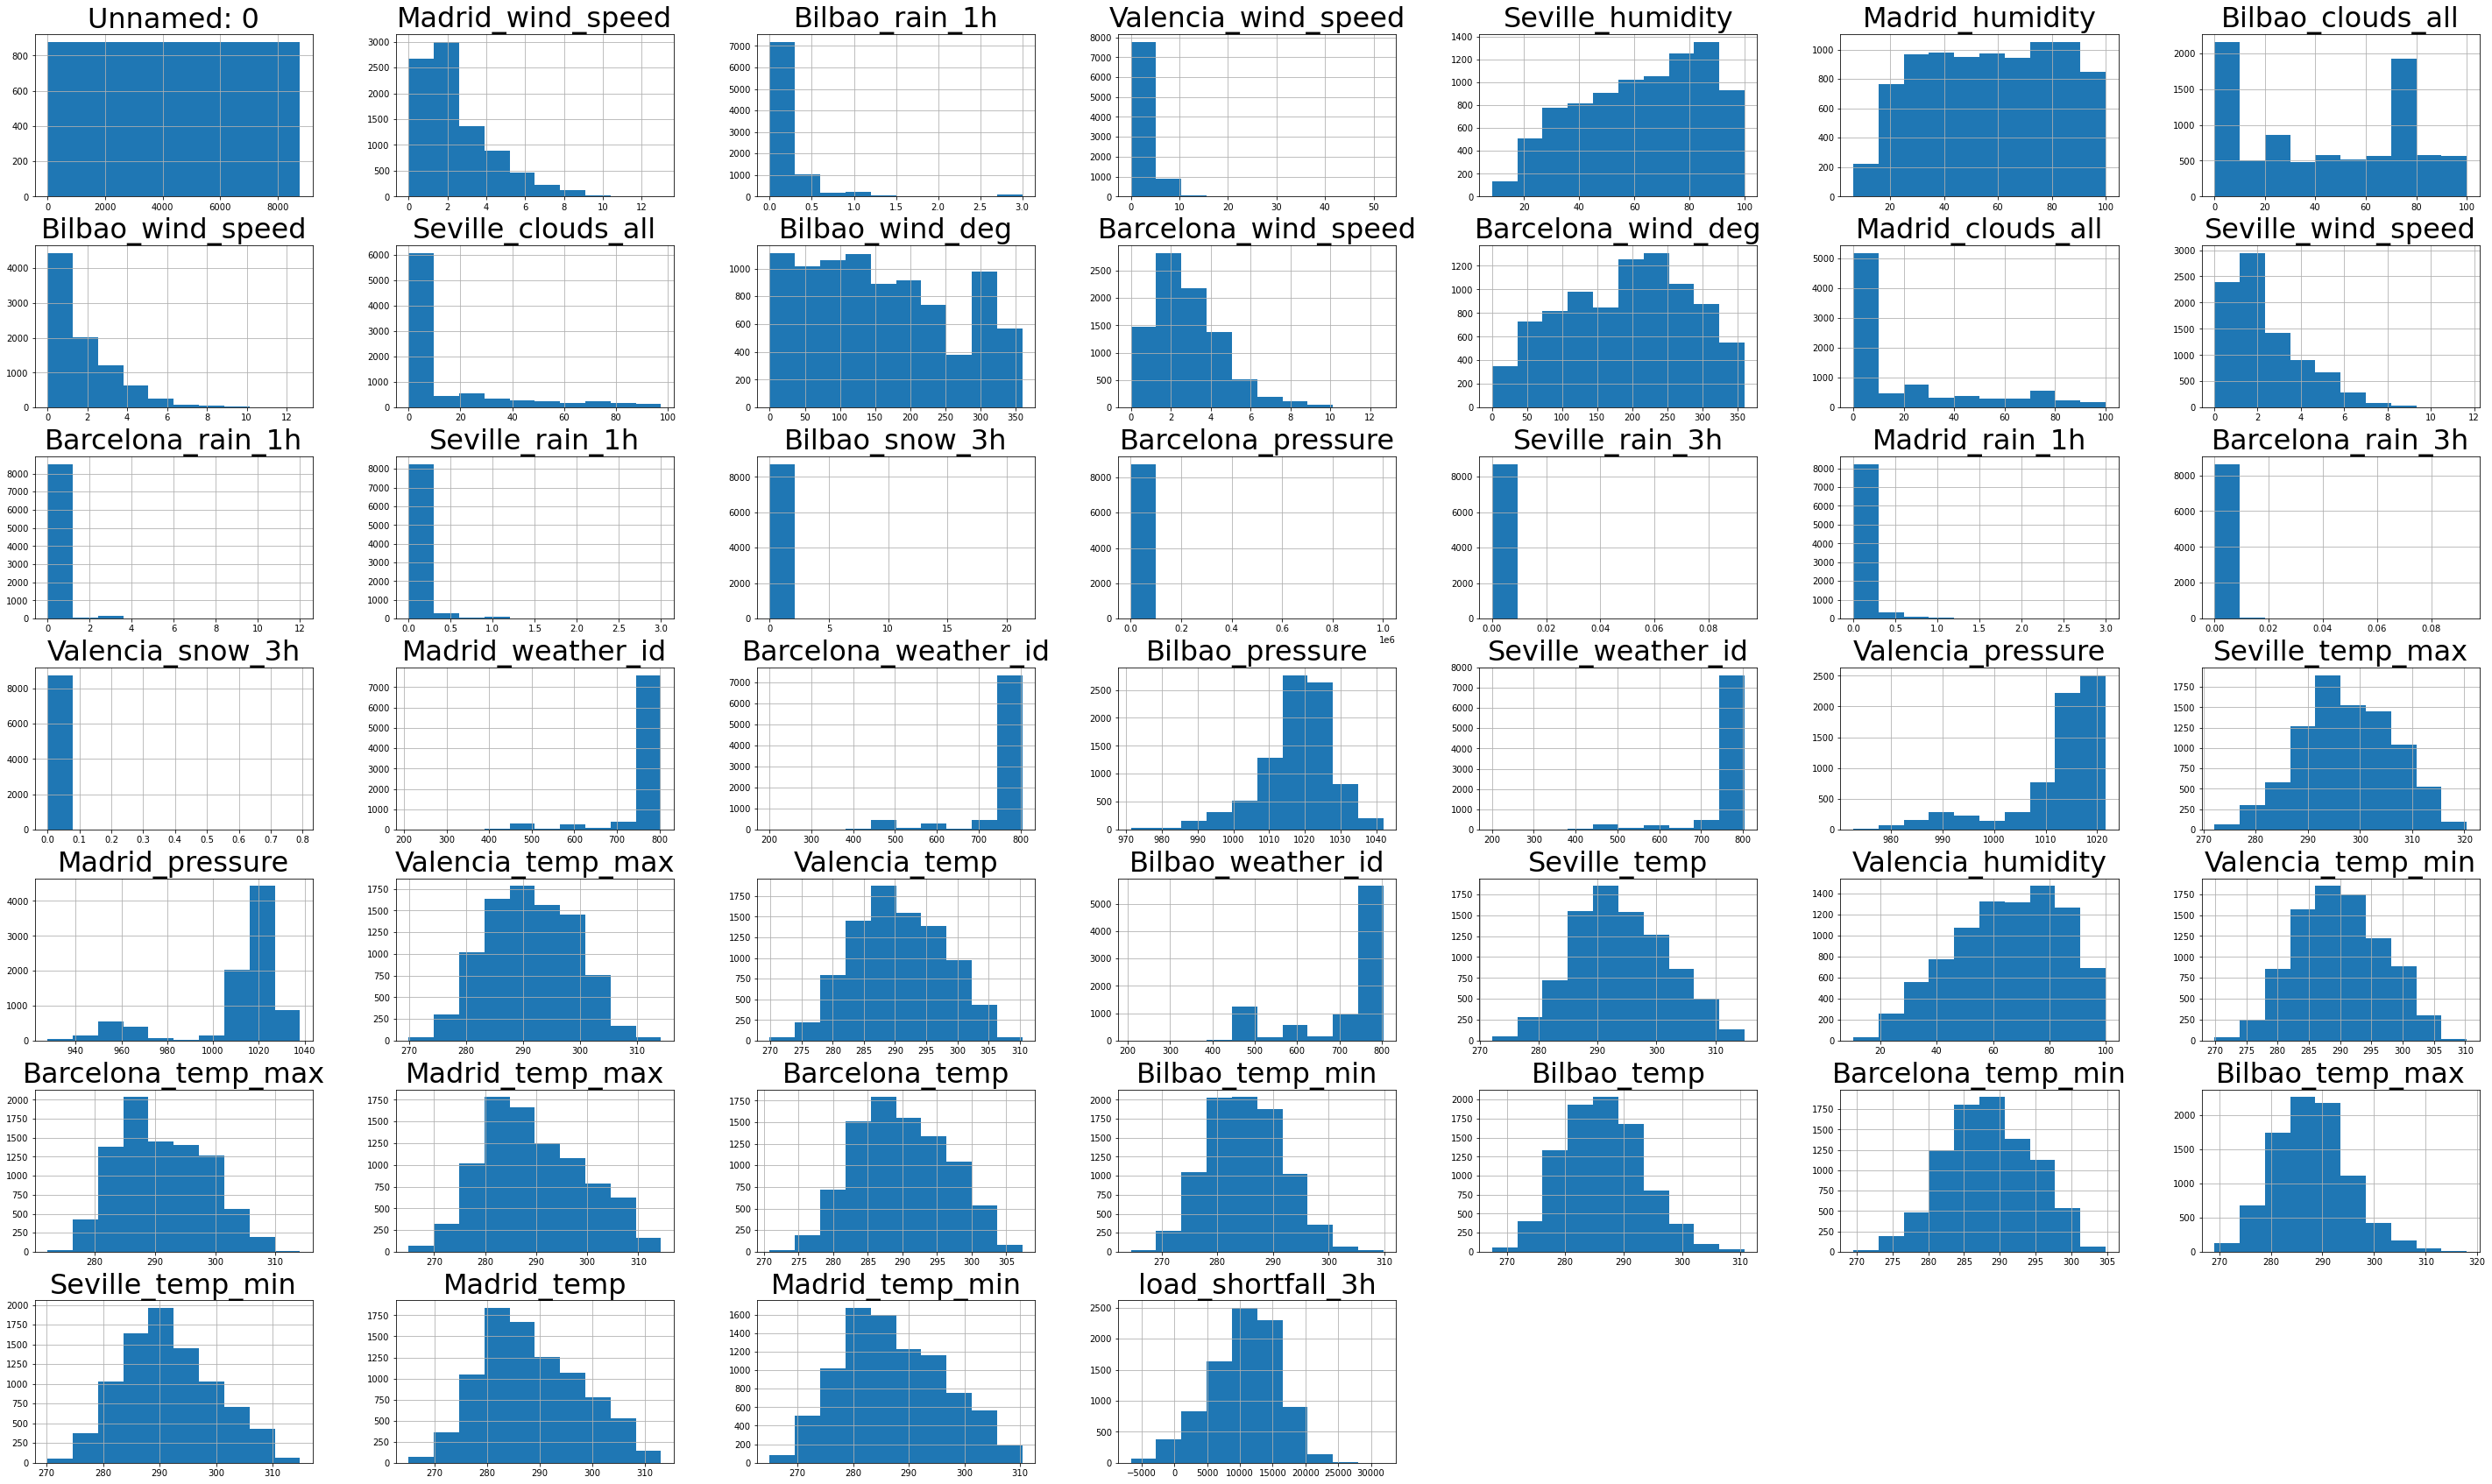

In [14]:
# plot feature distributions
fig = df.hist(figsize=(50, 30));
[x.title.set_size(32) for x in fig.ravel()];

- The .hist() function plots only numeric features and ignores any other type of data hence we do not see the Time , Seville_pressure and Valencia_wind_degree as they are not of numeric datatype.
- Histograms can either be normally distributed, right skewed and left skewed.


- Normal distributions are distributions that are symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. The mean, mode, median are equal in normal distributions. In the above histograms there is no feature that is symmetrical.


- Right skewed distributions are such that most data falls to the right of the graph's peak. features such as Bilbao_rain_1h, Bilbao_temp, Barcelona_rain_1h, Valencia_temp etc are skewed to the right.


- Left skewed distributions are such that the the tail of the distribution is on the left. Bilbao_pressure,Valencia_humidity, Valencia_pressure are left skewed.


- Too much skewness in the data may affect the models,the load_shortfall_3h is slightly skewed to the left however the skewness is not too much and we will leave as is.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In this section we will engineer the data, fix or correct the issues that we noted in the Exploratory data analysis.
This part of the project is necessary as it ensures we have the most clean data before we can start with the modelling process.
Unclean data can lead to distortions and ineffective functioning of the models, hence we will clean the data to ensure that it produces efeective modelling process.

### Datatypes conversions

During EDA we observed the following regarding some columns datatypes:

- Valencia_wind_deg and Seville_pressure are of object type.

Linear regression does not work on object datatype but on numeric datatype, we would need to convert the columns with object datatype to numeric.

These values in both the Valencia_wind_deg and Seville_pressure features consist of a string and a numeric value.

In the below columns we will extract the numeric part of the value and also convet the columns to numeric datatype in order to prepare for the modelling phase.

#### Valencia_wind_deg conversion

In [15]:
# Exctract numerics from Valencia_wind_deg
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')

In [16]:
# Test success of the extraction
df['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: object

The values now contain numeric data only, however the column is still of object type.
In the cell below we convert the column to a numeric datatype.

In [17]:
# Convert the Valencia_wind_deg to a numeric datatype
df['Valencia_wind_deg'] =pd.to_numeric(df['Valencia_wind_deg'])

In [18]:
#Check idf conversion was successful
df['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

The datatype of the column is int64 this means that our conversion was successful.

#### Seville_pressure conversion

In [19]:
#Extract numeric part from string
df.Seville_pressure = df.Seville_pressure.str.extract('(\d+)')

In [20]:
# Test Extraction was successful
df.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: object

The values in the column are now only numbers without any strings.
However the column is still of object type and ibelow we will change the column to be of a numeric datatype.

In [21]:
#Convert Seville_pressure column to numeric
df.Seville_pressure = pd.to_numeric(df.Seville_pressure)

In [22]:
# Test whether conversion was successful
df.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

The column is now of a numeric datatype as can be seen by the int64.

### Change time column to datetime
As observed in the exploratory data analysis, the time column was of object datatype.
We will convert the time column in the cells below to datetime object.

In [23]:
df['time'] = pd.to_datetime(df['time'])

In [24]:
#Check if conversion was successful
df.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

### Split date time feature 

Below we will split the Date Time Stamp such that we can get different information seperately like Year, Month, Day, Hour, Minute and Seconds.
This can be useful in terms of capturing the seasonal patterns in a dataset.
We will drop the time feature later on because some linear regression algoriths do not allow any datatype rather than numeric.
Splitting the time feature will then be helpful in capturing weather conditions at different seasons and as a result be helpful to the government of Spain in making business decisions and tpes of electricity generation methods will be beneficial for specific seasons.

In [25]:
df['Year']  = df['time'].astype('datetime64').dt.year
df['Month_of_year']  = df['time'].astype('datetime64').dt.month
df['Week_of_year'] = df['time'].astype('datetime64').dt.weekofyear
df['Day_of_year']  = df['time'].astype('datetime64').dt.dayofyear
df['Day_of_month']  = df['time'].astype('datetime64').dt.day
df['Day_of_week'] = df['time'].astype('datetime64').dt.dayofweek
df['Hour_of_week'] = ((df['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df['time'].astype('datetime64').dt.hour)
df['Hour_of_day']  = df['time'].astype('datetime64').dt.hour

C:\Users\MCMS\AppData\Local\Temp\ipykernel_38124\3113882888.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week_of_year'] = df['time'].astype('datetime64').dt.weekofyear


### Handling Missing Values

As we have observed in the EDA section, the Valencia_pressure feature consists of missing values.
Missing values needs to be handled correctly as they may lead to distorted findings if not.
There different types of ways to handle missing values such as dropping rows or columns with missing values, imputing the missing values with eaither the mean , median etc.

Valencia_pressure has about 23% of missing values
This value is not too large as a result we will not drop the column but will impute with the median of the column.
The reason for  choosing to impute the feature with the median is that we have observed that the column consist of outliers, so because the median is robust and less affected by outliers as compared to the mean.

In [26]:
# Finding the mean of the column with missing value
median_valencia_pressure = df['Valencia_pressure'].median()

#Fill the NAN values with column mean

df['Valencia_pressure'].fillna(value= median_valencia_pressure, inplace=True)

In [27]:
# Test if NAN Values are filled
df.isnull().sum().sum()

0

Sum of the null values is zero as can be seen above, this mean null values were successfully filled.

### Drop uneeded columns

- Below we will drop the Unnamed: 0 feature as it is a replica of the index column and will not have any impact in model building.

- We will also drop the time column as some linear regression algorithms does not work on datetime datatype.

In [28]:
df.drop(columns=['Unnamed: 0','time'], axis=1, inplace=True)

In [29]:
#Check the shape of dataset after dropping columns
df.shape

(8763, 55)

### Handling Multicollinearity

We have determined multi collinear columns in the EDA section and labelled them corr_featurs..
Below We will delete variables which have a correlation of 0.75 and above and drop them as they are multicollinear meaning they have a high chane of having the same information.
The reason we are dropping multicollinear cells is that they may have a negative impact on the predictive ability of our models.

In [30]:
df.drop(labels=corr_featurs, axis=1, inplace=True)

In [31]:
#Check shape of our dataframe after dropping multi-collinear features
df.shape

(8763, 39)

We have chosen a threshold of 0.75 as can be seen above to define highly correlated features.
We then dropped the columns which a highly correlated to each other and this can be seen as the number of featues have decreased to 37.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

The request from the government of Spain was that we model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as pressure, wind speed, humidity, etc.

Now that we have checked and cleaned our data, we will in this section use different types of model building algorithms in order to choose which model performs better on our dataset and present the best model.

### Split features

In the cell below we split the predictors and features where X are predictor features and y is the response feature.

In [32]:
# split predictors and response
X = df.drop(['load_shortfall_3h'], axis=1)
y = df['load_shortfall_3h']

### Preprocessing

#### Scaling

Data scaling is a techique that is used for making data points generalized so that the distance between them can be lower.
Since larger differences between the data points of input variables increase the uncertainty in the results of the model, scaling becomes of great importance.
There are two methods of scaling data namely: Normalization and Standardization
For the prupose of this project we will use standardization as it is able to handle outliers gracefully.
We have noted in the exploratory analysis that our data consists of outliers and for that standardization scaling will be used.
We did not remove any rows or columns with outliers as we did not want to miss any information or have distorted data and for that the standardization  sacling technique will be best for our data.

In [33]:
scaler = StandardScaler()

In [34]:
#Scaled 
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Bilbao_weather_id,Valencia_humidity,Year,Month_of_year,Week_of_year,Day_of_year,Day_of_month,Day_of_week,Hour_of_week,Hour_of_day
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0.649842,0.540928,-1.226179,-1.602429,-1.709703,-1.728991,-1.675368,-0.00274,-0.157423,-1.090901
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0.649842,0.298645,-1.226179,-1.602429,-1.709703,-1.728991,-1.675368,-0.00274,-0.095526,-0.654451
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0.649842,0.021750,-1.226179,-1.602429,-1.709703,-1.728991,-1.675368,-0.00274,-0.033629,-0.218001
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0.649842,-0.583957,-1.226179,-1.602429,-1.709703,-1.728991,-1.675368,-0.00274,0.028268,0.218449
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0.649842,-0.358980,-1.226179,-1.602429,-1.709703,-1.728991,-1.675368,-0.00274,0.090165,0.654899


#### Train Test Split.
Split our dataset into  80% training data and 20% test data.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

### Model Training

#### Multiple Linear Regression


In [36]:
# train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# predict on training dataset
predict_y = model.predict(X_test)

#### Ridge Regression

In [38]:
#train
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [39]:
#predict on training dataset
ridge_pred = ridge.predict(X_test)

#### Lasso Regression Model

In [40]:
#train
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

C:\Users\MCMS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.417e+10, tolerance: 1.892e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [41]:
#predict on training dataset
lasso_pred = lasso.predict(X_test)

#### Decision Tree

A decision tree is a machine learning model used to categorize or make predictions based on how a previous set of questions were answered.

In [42]:
# Fitting the model
Reg_tree = DecisionTreeRegressor(random_state=42)
Reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [43]:
#Predict on training dataset
Tree_pred = Reg_tree.predict(X_test)

#### Random Forest 

Random forest is a machine learning algorithm which combines the output of multiple decision trees to reach a single result


In [44]:
# Our forest consists of 200 trees with a max depth of 10 
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=200, max_depth=10)
# Fitting the model
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [45]:
RF_predict = RF.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### Model Evaluation: RMSE

In this section we will compare the models based on the RMSE
Root mean square error (RMSE) is the commonly used mearsure that shows how far predictions falls from the actual values.
The lower the RMSE, the better a given model is able to “fit” a dataset

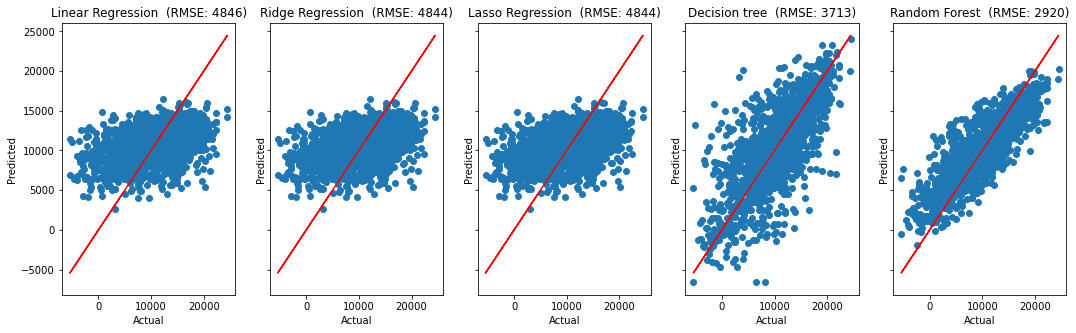

In [46]:
# Create figure and axes
f, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=5, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [model.predict(X_test),ridge.predict(X_test),lasso.predict(X_test), Reg_tree.predict(X_test), RF.predict(X_test)]
title = ['Linear Regression', 'Ridge Regression','Lasso Regression','Decision tree', 'Random Forest']

# Loop through all axes to plot each model's results 
for i in range(5):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

From the above plots, it can be observed that the Random Forest has the lowest RMSE value of 2920. And the lower the RMSE , the better the model prediction capabilities.

### Model Evaluation: MAE and R_squared

In this section we will use the Mean Absolute Error(MAE) to evaluate the models.
The MAE calculates the absolute difference between actual and predicted values.
Unlike the RMSE that was calculated above the MAE is more robust to outliers.


The R2 coefficient is a measure of how well the regression predictions approximate the real data points

In [68]:
results_dict = {
                    'MAE':
                    {
                       "Linear model": round((metrics.mean_absolute_error(y_test,predict_y)),2),
                        "Ridge": round((metrics.mean_absolute_error(y_test,ridge_pred)),2),
                        "Lasso" : round((metrics.mean_absolute_error(y_test,lasso_pred)),2),
                        "Decision Tree" : round((metrics.mean_absolute_error(y_test,Tree_pred)),2),
                        "Random Forest" : round((metrics.mean_absolute_error(y_test,RF_predict)),2)
                    },
                
                    'R squared':
                    
                       { "Linear model": round((metrics.r2_score(y_test,predict_y)),2),
                        "Ridge": round((metrics.r2_score(y_test,ridge_pred)),2),
                        "Lasso" : round((metrics.r2_score(y_test,lasso_pred)),2),
                        "Decision Tree" : round((metrics.r2_score(y_test,Tree_pred)),2),
                        "Random Forest" : round((metrics.r2_score(y_test,RF_predict)),2)
                       }
                }

# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [69]:
results_df

,MAE,R squared
Linear model,3857.46,0.17
Ridge,3858.04,0.17
Lasso,3858.06,0.17
Decision Tree,2626.58,0.51
Random Forest,2285.79,0.70


We can observe that the MAE values are slightly lower than the RMSE values for all models, this could be because of the fact the MAE measure is ribust to outliers as mentioned.

Again the Random Forest has a lower MAE of 2285.79 as compared to the other models.

Random forest has an R_squared coeeficient of 0.70.



### Best Model



####  Random Forest

Random forest is our best model for predicting the load_shortfall_3h due to the following reasons:

- It has the lowest Root Mean Square Error and the lowest Mean Absolute Error: this means that the measure bewteen the predicted and actual values are closer to each other as compared to the other models.
- It has an r squared coefficient of 0.70: this reveals that 70% of the variability observed in the target variable is explained by the regression model


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

### Model Explanations

Below are short explanations of the tried models:

1. **Multiple Linear regression**
Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables.
The goal of mutliple linear regressioon is to use the independant variables with known values to predict the value of the response variable.

2. **Ridge Regression**
Ridge regression analysis is a technique for analyzing multiple regression data where the predictor variables are highly correlated.

3. **Lasso Regression**
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. This also for data that suffers multicollinearity.

4. **Decision Tree**
Decision tree is a machine learning model that builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

5. **Random Forest (Best performing model)**

The Random forest builds decision trees on different samples. The random forest will then combine the predictions of the decision trees built and output the mean(regression) or mode(classification) to make best predictions as shown on diagram below:


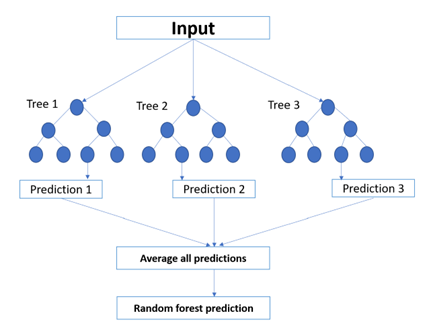


The ability of the Random forest to build multiple decision tree and aggeregate their results is the raeson for the random forest to perfom better.










### Conclusion

The aim of this project was to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain.
This is done because the use of electricity over the years has increased drastically and the use of purley non renewable resources is not sustainable.

We used the data that was collected and presented to us.The daaset contained 8763 features and 49 columns.
We first explored the data, cleaned the data and removed certain features which would not have an impact in the modelling process. We also deleted multicollinear columns as they were going to also impact the model's ability to predict negatively.We imputed missing values with the median of the column as the median is robust to outliers and our dataset included outliers. wE also converted columns with object datatypes to numeric datatypes.

After cleaning the data we began the model building process and build different types of models, evaluated the models using the Root mean squared error, Mean absolute error and also the coefficient r_squared to determine which model has the best predictive ability for predicting the response variable being the rain-shortfall-3h.
We built four models in total being multople linear regression, Ridge regression, Lasso regression, Decision tree and the Random Forest.

We found that the Random forest algorithm was the model with the best predictive capability as compared to the other models and chose the Random model as our best model.
This is the model which will be presented to the government officials of Spain.
This will help them in predicting the best three hourly load shotfall and make best business decision with regards to the expansion of their renewable energy resource infrastructure.
This will in turn help the government of Spain cope with the increase in the use of electricity and come up with ways of generating electricity that will be less costly.

The limitations of this project were outliers and missing values, we noted that 28 columns contained outliers and one column consisted of missing values. We however did not remove any feature or entries with outliers as we did not want to distort the data in any way.We also did not drop the column with missing values however imputed the missing values with the median of feature. We also used the Satndardization scaling technique which is robust to outliers before building our models.

Improvements for future purposes could include further investigations into where the outliers originates and also the reason behind missing values in order to better the model for predictions.

















### Test data preprocessing

In [49]:
dt = df_test.copy()

In [50]:
dt['Valencia_wind_deg'] = dt['Valencia_wind_deg'].str.extract('(\d+)')

In [51]:
dt['Valencia_wind_deg'] =pd.to_numeric(dt['Valencia_wind_deg'])

In [52]:
dt.Seville_pressure = dt.Seville_pressure.str.extract('(\d+)')

In [53]:
dt.Seville_pressure = pd.to_numeric(dt.Seville_pressure)

In [54]:
dt['time'] = pd.to_datetime(dt['time'])

In [55]:
dt['Year']  = dt['time'].astype('datetime64').dt.year
dt['Month_of_year']  = dt['time'].astype('datetime64').dt.month
dt['Week_of_year'] = dt['time'].astype('datetime64').dt.weekofyear
dt['Day_of_year']  = dt['time'].astype('datetime64').dt.dayofyear
dt['Day_of_month']  = dt['time'].astype('datetime64').dt.day
dt['Day_of_week'] = dt['time'].astype('datetime64').dt.dayofweek
dt['Hour_of_week'] = ((dt['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - dt['time'].astype('datetime64').dt.hour)
dt['Hour_of_day']  = dt['time'].astype('datetime64').dt.hour

C:\Users\MCMS\AppData\Local\Temp\ipykernel_38124\647014012.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dt['Week_of_year'] = dt['time'].astype('datetime64').dt.weekofyear


In [56]:
median_valencia_pressure = dt['Valencia_pressure'].median()

#Fill the NAN values with column mean

dt['Valencia_pressure'].fillna(value= median_valencia_pressure, inplace=True)

In [57]:
dt.drop(['Unnamed: 0', 'time'],axis=1,inplace=True)

In [58]:
dt.drop(['Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_humidity',
 'Madrid_pressure',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_max',
 'Valencia_temp_min'], axis=1, inplace=True)

### Saving Model

In [59]:
import pickle

model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(RF,file)

### Submission to Kaggle

In [60]:
RF_unseen = RF.predict(dt)

In [61]:
daf =pd.DataFrame(RF_unseen, columns=["load_shortfall_3h"])
daf.head()

,load_shortfall_3h
0,11141.354238
1,7663.049230
2,6681.919482
3,6502.292599
4,7597.480037


In [62]:
output = pd.DataFrame({"time":df_test["time"]})
submission = output.join(daf)
submission.to_csv("submission.csv", index=False)

In [63]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,11141.354238
1,2018-01-01 03:00:00,7663.049230
2,2018-01-01 06:00:00,6681.919482
3,2018-01-01 09:00:00,6502.292599
4,2018-01-01 12:00:00,7597.480037
...,...,...
2915,2018-12-31 09:00:00,7425.752339
2916,2018-12-31 12:00:00,7489.465598
2917,2018-12-31 15:00:00,7642.312187
2918,2018-12-31 18:00:00,7642.312187
